# Séance nº3 du 8 novembre 2017 : description de données par quantiles ; modélisation d’une relation (corrélation) ; approche Monte-Carlo

### 1. *Exercice 1 : nombre de chiffres significatifs et incertitude*

Écrire correctement ces chiffres :

 3.1415926535 ±0.0004262753 (1σ)

 3.1415926535 ±0.00942 (1σ)

 1234.56 ±23.45 (1σ)

<span style="color:blue">
Principe pour arrondir en tenant compte de l’incertitude : ne tenir compte que de l’ordre de grandeur de l’incertitude, arrondir le chiffre principal à cet ordre de grandeur.
    
    
    
3.1416 ±0.0004 (1σ)

3.14 ±0.01 (1σ)

1230 ±20 (1σ)
</span>

### 2. *Exercice 2 : algorithme, structure de fonction*

Reprendre l’algorithme de calcul de factoriel N (N!) : ajouter la fonction FACTORIEL(n) qui renvoie la valeur n !, et l’utiliser dans le corps principal.

In [1]:
def FACTORIEL1():
    n=int(input())
    N = 1
    Compteur = range(1,n+1)
    for i in Compteur:
       N *= i
    return(N)

def FACTORIEL2(n):
    N = 1
    Compteur = range(1,n+1)
    for i in Compteur:
       N *= i
    return(N)

N=FACTORIEL2(4)
N

24

### 3. *Exercice 3 : description et modélisation de données*



Des mesures de l’albedo de la surface du glacier d'Argentière (massif du Mt Blanc) ont été réalisées par satellite (mesures du 23 août 2003). Une mesure représente la valeur moyenne d’un pixel de 250x250m.

\* Lire la matrice des valeurs dans le fichier ‘Argentiere\_clip.asc’. En faire une représentation 3D (X-Y-Z). Les valeurs nulles correspondent à des surfaces non glaciaires.

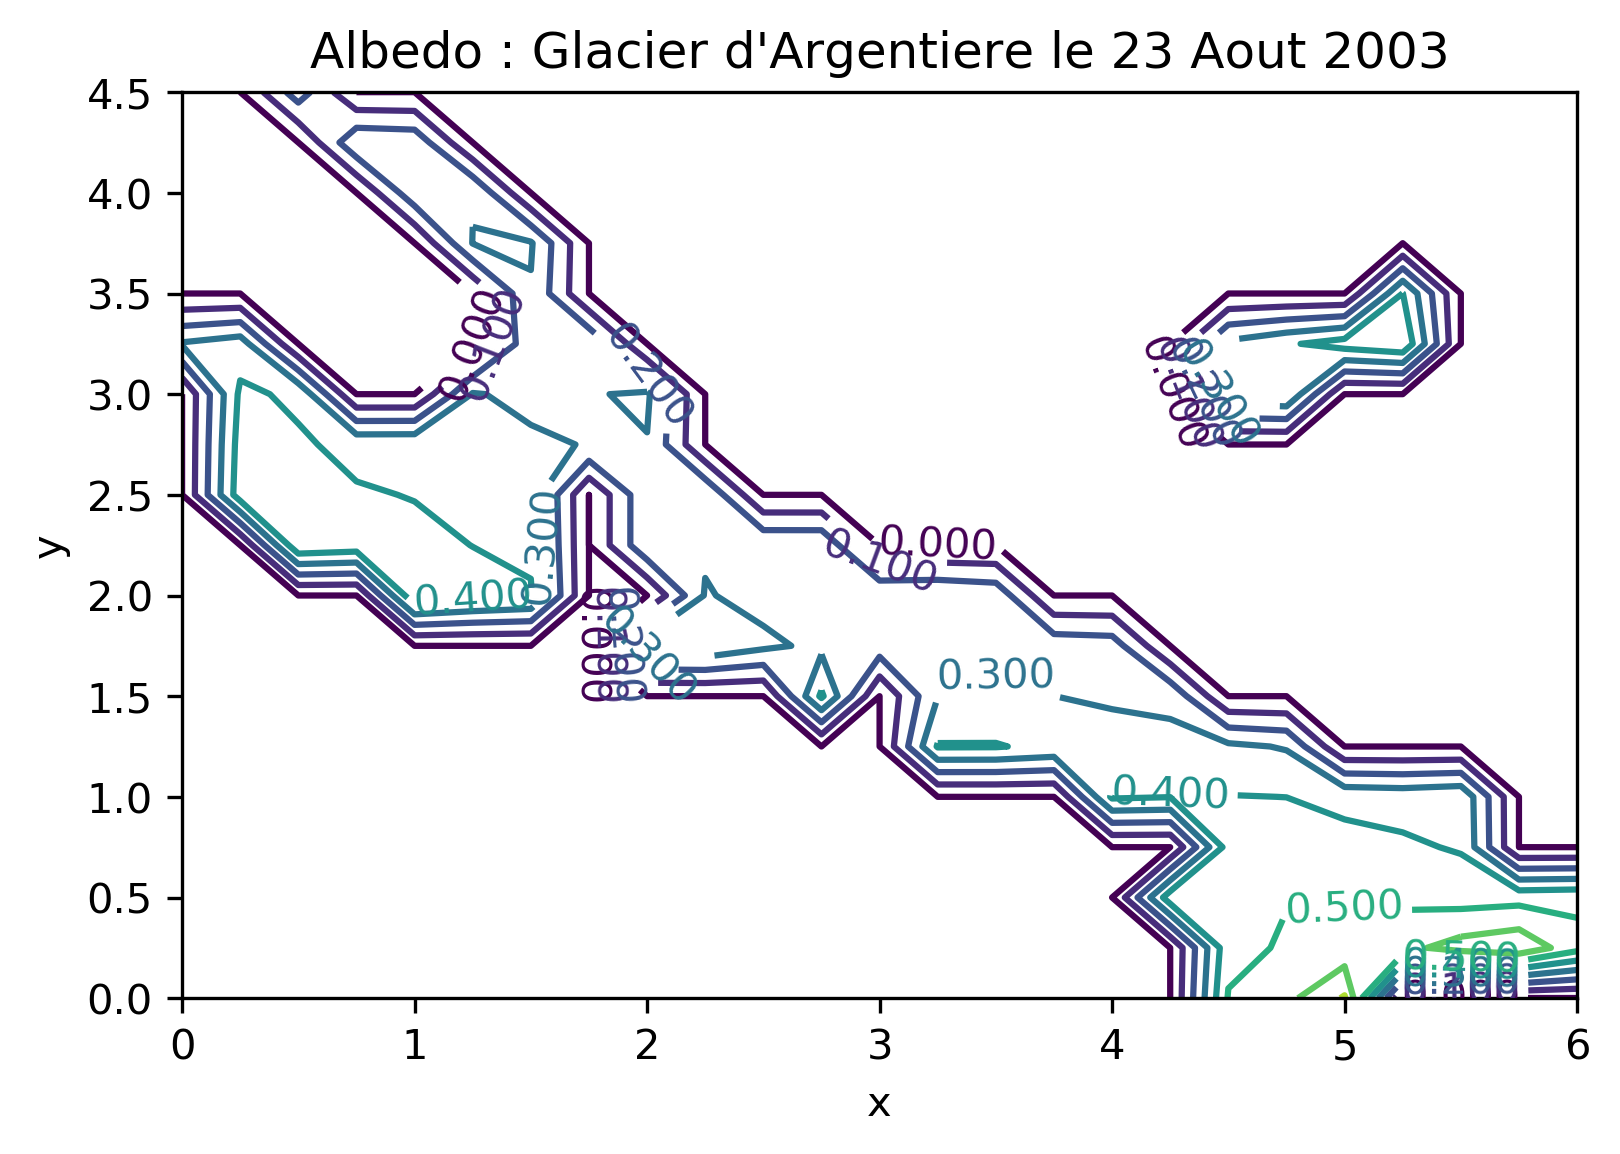

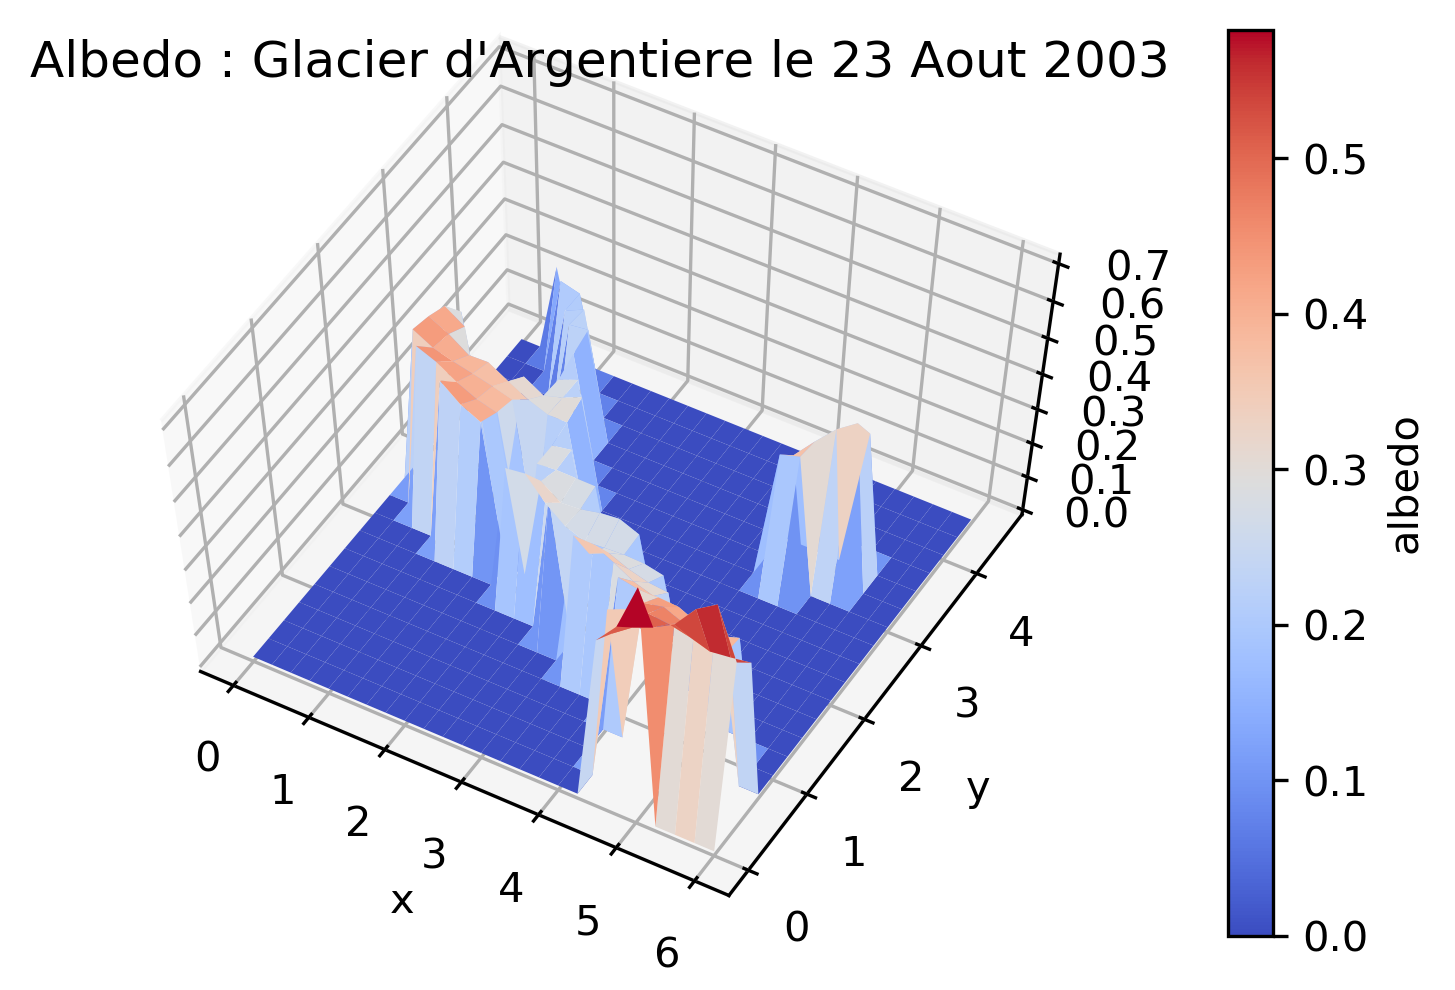

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

path_data = 'Argentiere_alb030823.asc' # chemin d'accès au fichier

albedo = np.loadtxt(path_data, skiprows = 6, dtype = float) #chargement des fichier, on ne veut pas les 6 premières 
#lignes

y=np.linspace(18/4,0,19) # vecteur des 19 valeurs en y de 4,5km à 0km
x=np.linspace(0,24*.25,25) #vecteur des 25 valeurs en x de 0 à 6 km

#figure 2D
fig = plt.figure(0, dpi=300) # je crée une figure/ dpi (Dots Per Inche) : taille de la figure
C_albedo = plt.contour(x,y,albedo) # Contour plot, permet d'afficher par couleur une valeur en fonction de 
#sa localisation, à la même façon de courbe de niveau sur une carte IGN. Ici nous traçons des lignes d'iso-albedo.
#On a donc 3 informations sur ce graphe (coordonnées selon X et Y ainsi que la valeur d'albedo par pixel).
plt.clabel(C_albedo, inline=0.2, fontsize = 10) # Commande permettant d'afficher la valeur des courbes d'albedo.
plt.title('Albedo : Glacier d\'Argentiere le 23 Aout 2003')
plt.xlabel('x')
plt.ylabel('y')

#figure 3D
X, Y = np.meshgrid(x, y)# définition d'un mesh X et Y auront la même "shape" que nos valeurs d'albedo

fig = plt.figure(10, dpi=300)
ax = fig.gca(projection='3d')#gca = get current axis / je défini les axes de ma figure comme étant à 3 dimensions
#ax est la variable comprenant mes axes
surf=ax.plot_surface(X,Y,albedo, cmap=cm.coolwarm) 
plt.title('Albedo : Glacier d\'Argentiere le 23 Aout 2003')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surf,label='albedo')
ax.view_init(60,300) # je defini l'angle de vue (angle vertical de -90 à 90, angle horizontal de 0 à 360)



\* Graphe des valeurs ordonnées : faire un graphe X-Y où chaque valeur est représentée par un point avec la même abscisse (par ex. 1) pour tous les points. Décrire la répartition des points. Calculer les quartiles et comparer ces valeurs avec le graphe. (NB : On pourra lire les valeurs non nulles dans le fichier unicolonne ‘Argentiere\_clip\_vect.asc’)

Text(0, 0.5, 'albedo')

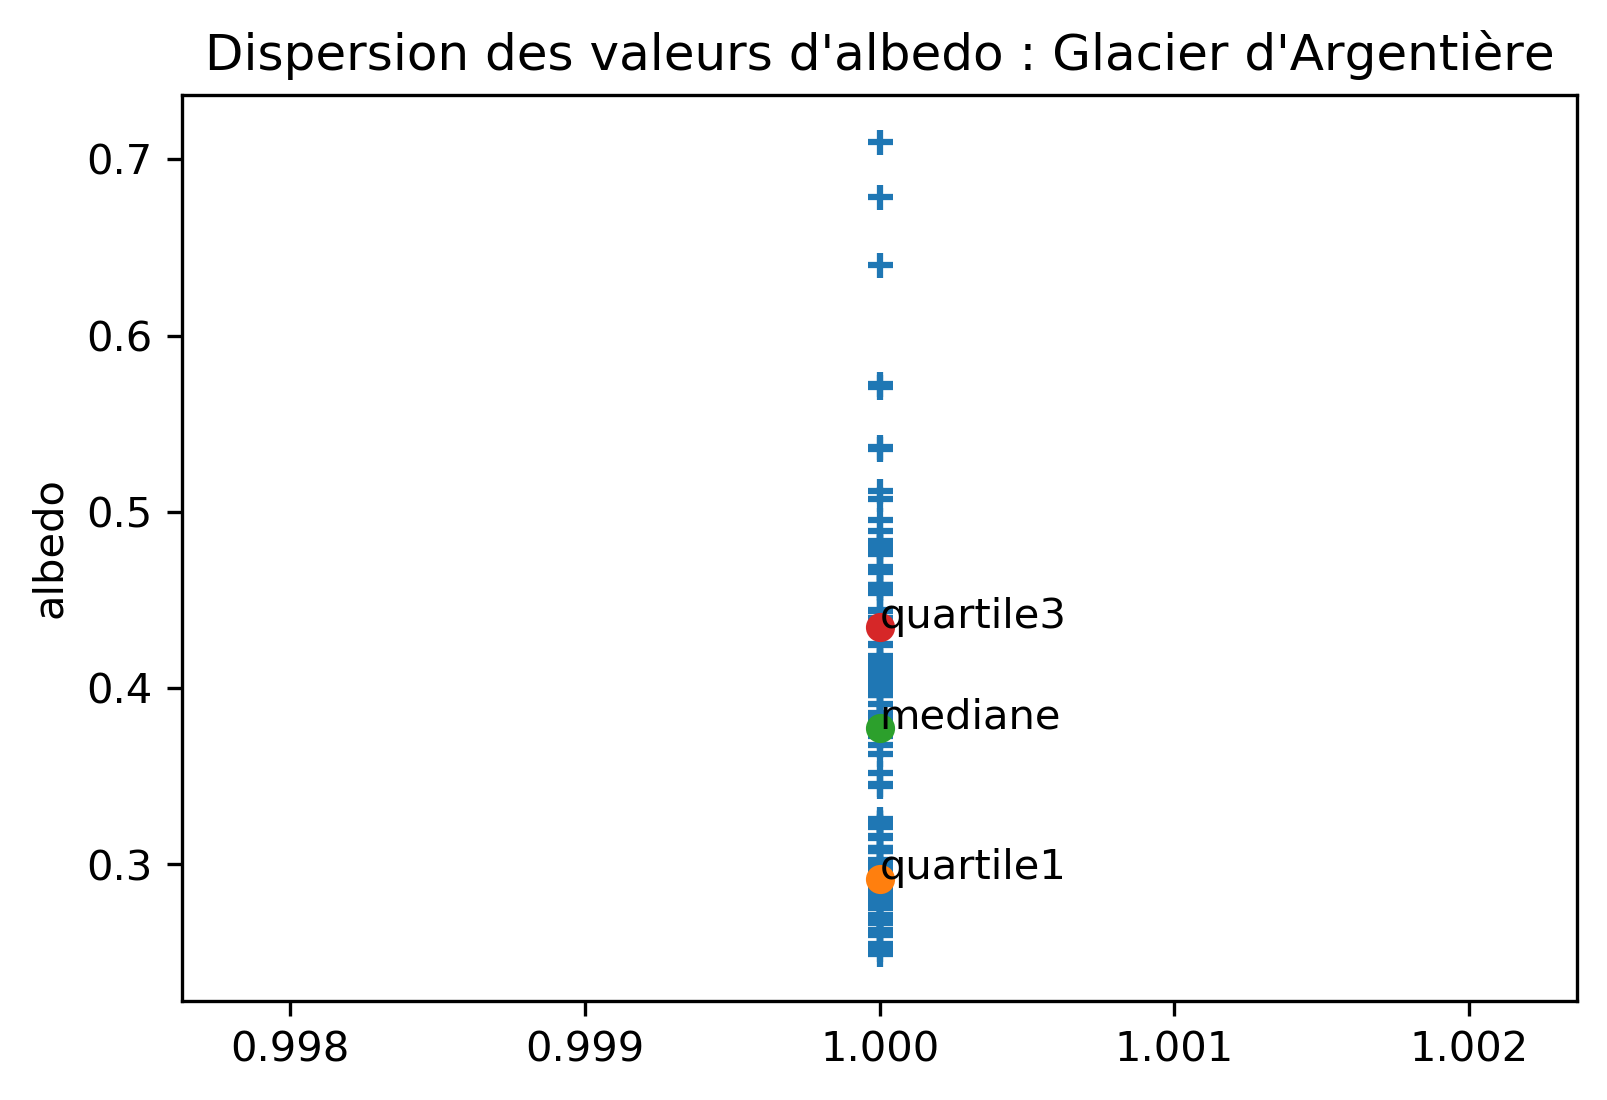

In [22]:

albedo_0=albedo[np.where(albedo!=0)] # je cherche la position de l'ensemble des valeurs différente de 0
#puis je les sélectionnes

x=np.ones(np.shape(albedo_0)) # je crée une matrice composé de 1 qui à la même structure que albedo_0


fig=plt.figure(2,dpi=300)
plt.scatter(x,albedo_0,marker='+')# je fais un nuage de point et je défini le symbole comme étant un +
plt.title('Dispersion des valeurs d\'albedo : Glacier d\'Argentière')

quartile1=np.quantile(albedo_0,0.25)
mediane=np.median(albedo_0) #si on calcule la moyenne on verra qu'elle est très similaire à la médiane
quartile3=np.quantile(albedo_0,0.75)

plt.scatter(1,quartile1)
plt.text(1,quartile1,'quartile1')
plt.scatter(1,mediane)
plt.text(1,mediane,'mediane')
plt.scatter(1,quartile3)
plt.text(1,quartile3,'quartile3')

plt.ylabel('albedo')



\* Synthèse de la distribution des valeurs avec un graphe en ‘boîte à moustaches’ (‘box and whiskers plot’ ou
simplement ‘boxplot’). NB : ne pas tenir compte des valeurs nulles.

\* Distribution sur un axe en quantiles : ordonner les valeurs non nulles ; les représenter sur un graphe X-Y
avec en X l’index normalisé (0-100%) de chaque valeur et en Y la valeur. Décrire la forme de cette
distribution. Application : quelle proportion du glacier possède un albedo inférieur à 0.32 (cette valeur peut
être considérée comme seuil entre zones d'ablation et d'accumulation) ?

#### 3.3 *Corrélation entre albedo et bilan de masse d’un glacier*

Le bilan de masse (gain ou perte nette de masse de l’ensemble du glacier) a aussi été mesuré. Le jeu de données (fichier ‘Donnees\_BM-Albedo\_Argentiere\_2000-2014.csv’) contient l’albedo moyen (minimum atteint en septembre) et le bilan de masse, pour 15 années.

\* Réaliser un graphe de corrélation X-Y des données, bilan en fonction de l’albedo. Calculer le coefficient de
corrélation.

\* Quel modèle simple convient pour décrire la relation entre ces deux paramètres ? Calculer pente et intercept du modèle linéaire de régression, ainsi que leur incertitude.

\* Estimation des incertitudes du modèle linéaire par approche Monte-Carlo : ce modèle est appliqué sur 3000
échantillons des données (technique 'Bootstrap'). Ré-échantillonner les couples de valeurs albedo - bilan de
masse 3000 fois (avec remise). Pour chaque échantillon (parmi les 3000) de 15 couples de valeurs, calculer
pente et intercept de la régression linéaire. Calculer enfin moyenne et écart type de ces deux paramètres.
Comparer avec les statistiques obtenues ci-dessus sous hypothèse de distribution normale.


---------------------------------

### Rappels de cours : métriques de corrélation par méthode quadratique (‘moindres carrés’)

Pour deux séries x et y de *n* éléments, de moyennes $\bar{x}$ et $\bar{y}$, on peut calculer les coefficients suivants :

les variances et $$Var_x=\frac{1}{n} \cdot \sum_1^n(x-\bar{x})^2 $$  $$Var_y=\frac{1}{n} \cdot \sum_1^n(y-\bar{y})^2$$,

les écarts types $ \sigma_x=\sqrt{Var_x}$ et $\sigma_y=\sqrt{Var_y} $,

la covariance $$Cov_{xy}=\frac{1}{n}\sum_1^n(x-\bar{x})\cdot(y-\bar{y})$$,

le coefficient de corrélation est alors $r=\frac{Cov_{xy}}{\sigma_x\sigma_y}$.

La régression linéaire est obtenue en minimisant la somme des distances quadratiques (SSE = *Sum of squared errors*) entre chaque point et la droite de régression d’équation y = ax + b : $$SSE=\sum_1^n(y-(ax+b))^2 $$. On peut alors déterminer analytiquement a et b comme : a = *r*. σ<sub>y</sub>/σ<sub>x</sub> et $b = \bar{y} - a.\bar{x}$.

On suppose que les séries x et y ont des moyennes qui vérifient effectivement $\bar{y}(x) = ax+b$, et que chaque valeur y est distribuée normalement autour de $\bar{y}(x)$, avec un écart type σ<sub>e</sub>. Un bon estimateur de σ<sub>e</sub> est alors : $$\sigma_e=\sqrt{\frac{1}{n-2}\cdot\sum_1^n(y_(ax+b))^2} $$.

Les incertitudes sur *a* et *b* peuvent être estimées par leur écart type : $$\sigma_a=\frac{\sigma_e}{\sqrt{n}\cdot\sigma_e}$$ et $$\sigma_b=\frac{\sigma_e}{\sqrt{n}\cdot\sigma_e}\cdot\sqrt{\frac{1}{n}\cdot\sum_1^nx^2}$$

 Intervalles de confiance :

De façon standard on définit les intervalles de confiance au niveau *p* (par exemple *p*=95%) avec la distribution de Student et le coefficient t<sub>n-2,(1-p)/2</sub> (n-2 degrés de liberté) c’est à dire la valeur de t qui laisse α = (1‑p)/2 probabilité résiduelle.

L’intervalle de confiance sur a est ±σ<sub>a</sub>.t<sub>n-2,α</sub> et sur b ±σ<sub>b</sub>.t<sub>n-2,α</sub> .

L’intervalle de confiance sur la droite de régression (c’est à dire sur la valeur moyenne y(x) ) est : 

$$y(x)\pm \sigma_e\cdot t_{n-2,\alpha}\sqrt{\frac{1}{n}+\frac{(x-\bar{x})^2}{\sum_1^n(x-\bar{x})^2}}=y(x)\pm \sigma_e\cdot t_{n-2,\alpha}\sqrt{\frac{1}{n}+\frac{(x-\bar{x})^2}{n\cdot\sigma_x^2}}$$

L’intervalle de confiance sur la distribution des valeurs y(x) autour de leur moyenne y(x) est : $$y(x)\pm \sigma_e\cdot t_{n-2,\alpha}\sqrt{1+\frac{1}{n}+\frac{(x-\bar{x})^2}{n\cdot\sigma_x^2}}$$

## Robustesse de la médiane

L'un des intérêts de la médiane est sa robustesse aux valeurs extrêmes, notamment lorsque le nombre de mesures est petit (en pratique, moins de 20). Le graphe ci-contre représente une série de mesures (à gauche), avec indiquées la moyenne (barre noire) et la médiane (barre grise). Si on supprime la valeur basse extrême (considérée comme ‘anormale’), à droite, la moyenne augmente sensiblement, mais la médiane ne change pas.
On voit donc que la médiane est d'un grand intérêt pour caractériser une série de valeurs; et aussi que la comparaison entre moyenne et médiane est intéressante.

![médiane](fig_mediane.png)